In [1]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
from statsmodels.tsa import arima_process



In [2]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None
    


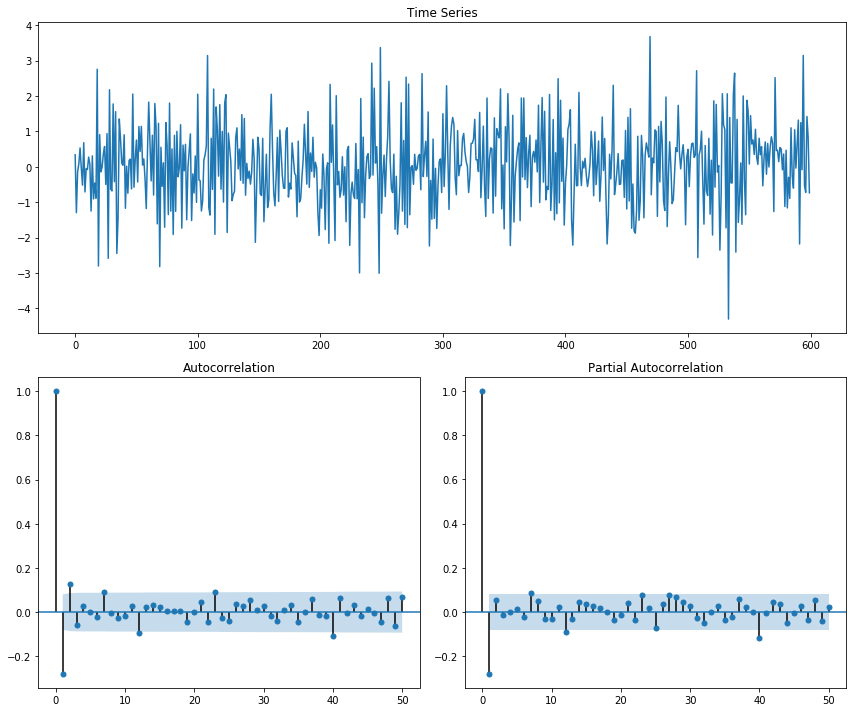

In [9]:
        
# Number of samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1ma1_data )


Text(0.5, 0, 'Lag')

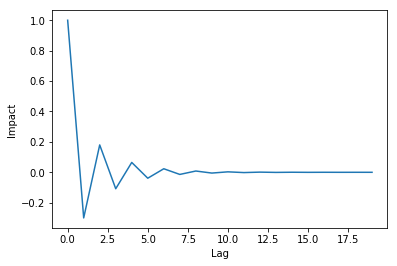

In [10]:
# Impluse response curve
plt.plot(arima_process.arma_impulse_response(ar, ma, nobs=20))
plt.ylabel("Impact")
plt.xlabel("Lag")




In [11]:
# Build AR(1) model
ar1ma1 = smtsa.ARMA(ar1ma1_data.tolist(), order=(1, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ar1ma1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -903.381
Method:                           mle   S.D. of innovations              1.090
Date:                Fri, 07 Feb 2020   AIC                           1812.762
Time:                        14:58:38   BIC                           1825.952
Sample:                             0   HQIC                          1817.897
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.4589      0.124     -3.687      0.000      -0.703      -0.215
ma.L1.y        0.1981      0.137      1.445      0.149      -0.071       0.467
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1792           +0.0000j            2.1792            0.5000
MA.1           -5.0470           +0.0000j            5.0470            0.5000
-----------------------------------------------------------------------------
"""

In [13]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(1,3):
        arma_obj = smtsa.ARMA(ar1ma1_data.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])


In [16]:
# Load modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# Load Dataset
ibm_df = pd.read_csv('../Data Files/ibm-common-stock-closing-prices.csv')
ibm_df.head()
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'},
inplace=True)
ibm_df.head()

,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


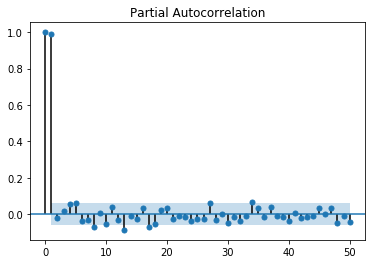

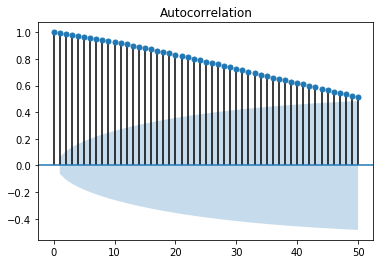

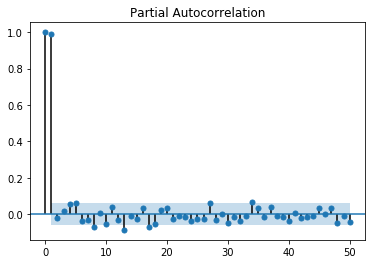

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
ibm_df['residual']=ibm_df['Close_Price']-ibm_df['Close_Price'].mean()
ibm_df=ibm_df.dropna()
plot_acf(ibm_df.residual, lags=50)
plot_pacf(ibm_df.residual, lags=50)

In [22]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(0,3):
        arma_obj = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(ari,maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])

In [23]:
# Building optimized model using minimum AIC
arma_obj_fin = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(1,1)).fit(maxlag=30, method='mle', trend='nc')
ibm_df['ARMA'] = arma_obj_fin.predict()

Text(0, 0.5, 'Closing price')

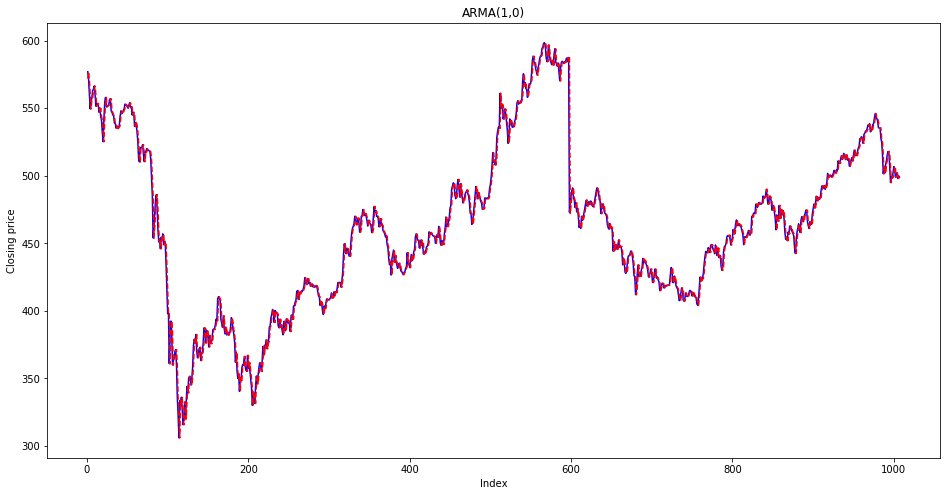

In [33]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(16, 8)
ibm_df['Close_Price'].iloc[1:].plot(color='b', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price') #Plot the curves

